In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Online Retail.xlsx')

<h2> Разобраться с данными, какие в базе есть переменные, что они обозначают, какие у них шкалы? (количественные, порядковые, номинальные) </h2>

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000



Это транснациональный набор данных, который содержит все транзакции, произошедшие в период с 12.01.2010 по 12.09.2011 для зарегистрированной в Великобритании розничной онлайн-торговли, не являющейся магазином. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.

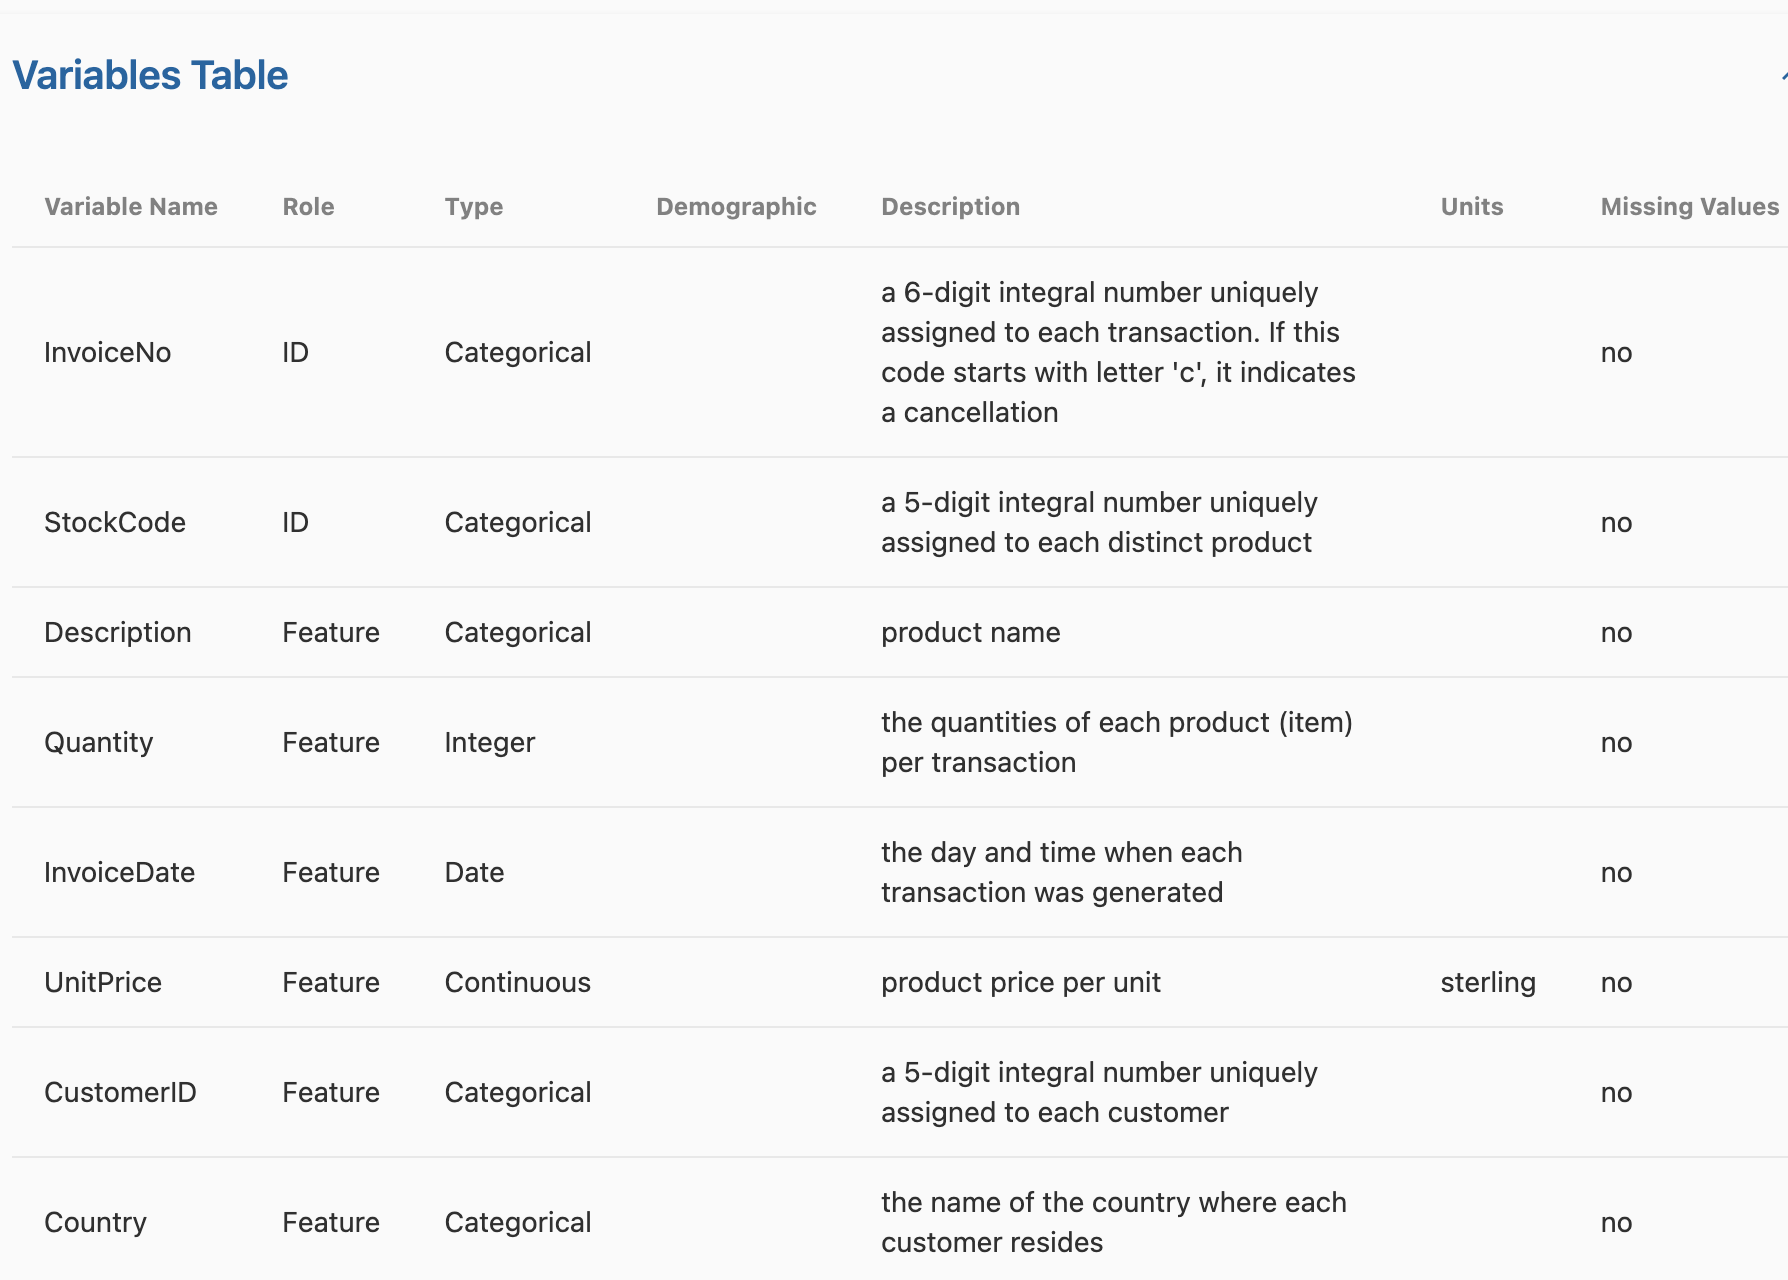

**InvoiceNo:** номер счета. Номинальная шкала
шестизначное целое число, уникально присваиваемое каждой транзакции. 
Если этот код начинается с буквы «c», это означает отмену.

**StockCode:** код продукта (товара). Номинальная шкала.
Пятизначное целое число, уникально присвоенное каждому отдельному продукту.

**Description**: Название продукта (товара). Номинальная шкала.

**Quantity**: количество каждого продукта (товара) за транзакцию. Количественная шкала (Целочисленная)

**InvoiceDate:** дата и время выставления счета. Дата.
Числовой день и время создания каждой транзакции.

**UnitPrice:** цена за единицу. Количественная шкала (Неприрывная)
Цена за единицу продукта в фунтах стерлингов.

**CustomerID:** номер клиента. Номинальная шкала. 
Пятизначный целый номер, однозначно присваиваемый клиенту.

**Страна:** Название страны. Номинальная шкала. 
Название страны, в которой проживает клиент.


<h2> Ответьте на следующие вопросы по базе (Данные-> Удалить дубликаты): </h2>

In [6]:
duplicates = df.duplicated()
df[duplicates] #дубликаты

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [7]:
df = df.drop_duplicates()

**a.** Сколько всего наблюдений

In [8]:
df.shape[0]

536641

**b.** Сколько всего было покупок (чеков), сколько чеков возврата

In [9]:
df.InvoiceNo.nunique() #всего

25900

In [10]:
#возврат
df_with_c = df[df['InvoiceNo'].str.contains('C', na=False)]

df_with_c.InvoiceNo.nunique()

3836

**c.** Сколько всего клиентов

In [11]:
df.CustomerID.nunique() 

4372

**d.** Какая дата самой первой покупки и какая дата самой последней покупки

In [12]:
df.InvoiceDate.min() #первая

Timestamp('2010-12-01 08:26:00')

In [13]:
df.InvoiceDate.max() #последняя

Timestamp('2011-12-09 12:50:00')

<h2>Проанализировать данные на пропуски, выбросы, ошибки. Принять решение для
дальнейшего анализа.</h2>

In [14]:
import plotly

In [15]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [16]:
df.isnull().sum()/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

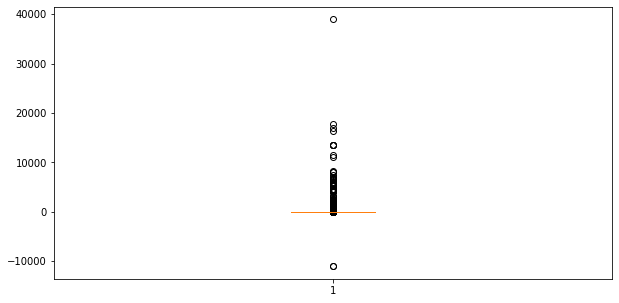

In [17]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize =(10, 5))
plt.boxplot(df['UnitPrice'])
plt.show()

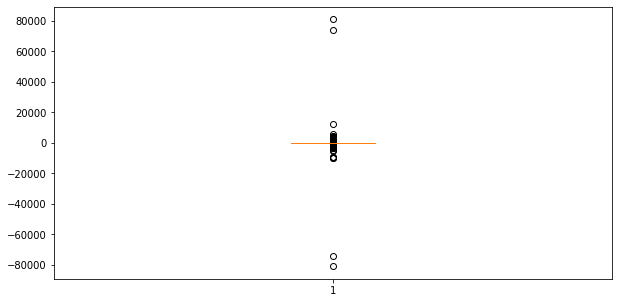

In [18]:
fig = plt.figure(figsize =(10, 5))
plt.boxplot(df['Quantity'])
plt.show()

In [19]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [20]:
df[df['UnitPrice'] >= 30000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


In [71]:
df[(df['Quantity'] < 0) & (df['CustomerID'].isnull() == True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [77]:
df[(df['Quantity'] > 0) & (df['CustomerID'].isnull() == True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [79]:
df[df['CustomerID'].isnull() == True].groupby('Country').InvoiceNo.nunique()/df[df['CustomerID'].isnull() == True].InvoiceNo.nunique()*100

Country
Bahrain            0.053908
EIRE               1.105121
France             0.080863
Hong Kong          0.404313
Israel             0.080863
Portugal           0.026954
Switzerland        0.080863
United Kingdom    98.032345
Unspecified        0.134771
Name: InvoiceNo, dtype: float64

In [22]:
df[df['Quantity'] > 7000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [23]:
df[df['Quantity'] < -7000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.00,NaN,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [24]:
df[df['CustomerID'].isnull() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [25]:
df[df['InvoiceNo'] == '536414']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [26]:
df[df['StockCode'] == 22139]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,NaN,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [27]:
df[(df['StockCode'] == 22139) & (df['Description'].isnull()==True)].count()

InvoiceNo      4
StockCode      4
Description    0
Quantity       4
InvoiceDate    4
UnitPrice      4
CustomerID     0
Country        4
dtype: int64

In [68]:
df_unique = df[['InvoiceNo', 'StockCode', 'Description']].drop_duplicates(subset=['StockCode', 'Description', 'InvoiceNo'])
df_unique = df_unique.dropna(subset=['Description'])
# получаем количество вхождений каждого значения в столбце 'name'
counts = df['Description'].value_counts()

In [29]:
grouped = df_unique.groupby(['StockCode','Description'])['InvoiceNo'].count()

# для каждого id выбираем description с максимальным общим количеством заказов
max_orders_index = grouped.groupby(level=0).idxmax()

# выбираем соответствующие строки из исходного датафрейма
result = df_unique.set_index(['StockCode', 'Description']).loc[max_orders_index].reset_index()

result = result.drop('InvoiceNo', axis=1)

result = result.drop_duplicates()
result = result.rename(columns={'Description': 'New Description'})
print(result.shape)
result.head()

(3958, 2)


,StockCode,New Description
0,10002,INFLATABLE POLITICAL GLOBE
71,10080,GROOVY CACTUS INFLATABLE
93,10120,DOGGY RUBBER
122,10125,MINI FUNKY DESIGN TAPES
213,10133,COLOURING PENCILS BROWN TUBE


In [30]:
df2 = pd.merge(df, result, on='StockCode', how='left')
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,New Description
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.
...,...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE


In [31]:
print(df2.isnull().sum())

InvoiceNo               0
StockCode               0
Description          1454
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID         135037
Country                 0
New Description       112
dtype: int64


In [33]:
df2[df2['New Description'].isnull() == True].CustomerID.isnull().sum()

112

In [34]:
df2[(df2['New Description'].isnull() == True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,New Description
1934,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,NaN
1951,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,NaN
1952,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,NaN
1984,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,NaN
1986,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
278517,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom,NaN
279376,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom,NaN
279377,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom,NaN
344158,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom,NaN


In [35]:
df2[(df2['InvoiceNo'].str.contains('C')) & (df2['Quantity'] > 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,New Description


In [36]:
df2[(df2['InvoiceNo'].str.contains('C')) & (df2['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,New Description
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Discount
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,SET OF 3 COLOURED FLYING DUCKS
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,PLASTERS IN TIN CIRCUS PARADE
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,PACK OF 12 PINK PAISLEY TISSUES
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,PACK OF 12 BLUE PAISLEY TISSUES
...,...,...,...,...,...,...,...,...,...
535188,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,ZINC T-LIGHT HOLDER STARS SMALL
536280,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,Manual
536447,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,VICTORIAN SEWING BOX LARGE
536448,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,HANGING HEART JAR T-LIGHT HOLDER


In [37]:
df2[(df2['InvoiceNo'].str.contains('C') == False) & (df2['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,New Description


In [38]:
df2.Description.isnull().sum() - df2['New Description'].isnull().sum()

1342

Это сколько Nan было заполнено

In [39]:
df2['UnitPrice_Mod'] = df2['UnitPrice'].abs()
df2['Quantity_Mod'] = df2['Quantity'].abs()

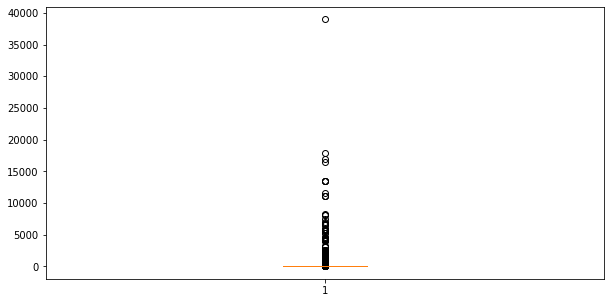

In [40]:
fig = plt.figure(figsize =(10, 5))
plt.boxplot(df2['UnitPrice_Mod'])
plt.show()

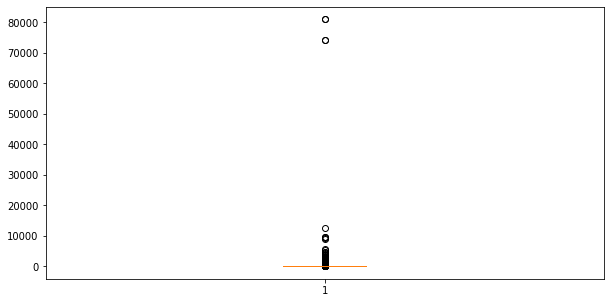

In [41]:
fig = plt.figure(figsize =(10, 5))
plt.boxplot(df2['Quantity_Mod'])
plt.show()

In [42]:
print(df2[df2['UnitPrice_Mod'] > 50].shape[0]/df2.shape[0])
df2 = df2[df2['UnitPrice_Mod'] <= 50]

0.00237589002703856


In [43]:
print(df2[df2['Quantity_Mod'] > 50].shape[0]/df2.shape[0])
df2 = df2[df2['Quantity_Mod'] < 50]

0.024450562792556866


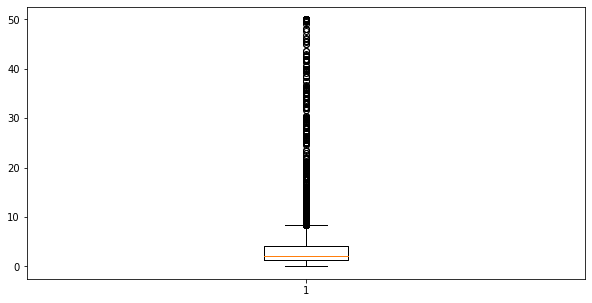

In [44]:
fig = plt.figure(figsize =(10, 5))
plt.boxplot(df2['UnitPrice_Mod'])
plt.show()

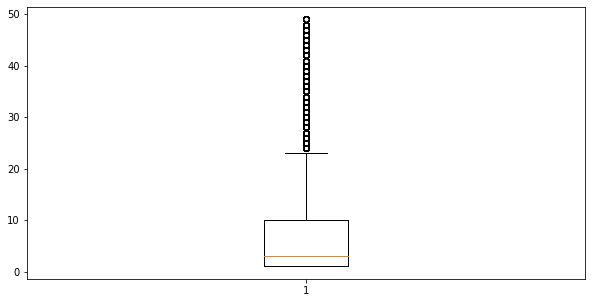

In [80]:
fig = plt.figure(figsize =(10, 5))
plt.boxplot(df2['Quantity_Mod'])
plt.show()

In [45]:
print(df2.shape[0]/df.shape[0])

0.9714781390165865


In [46]:
df2.describe()

,Quantity,UnitPrice,CustomerID,UnitPrice_Mod,Quantity_Mod
count,521335.000000,521335.000000,388412.000000,521335.000000,521335.000000
mean,6.609249,3.329654,15286.026428,3.329654,6.837122
std,8.682169,3.656680,1713.577993,3.656680,8.503881
min,-49.000000,0.000000,12347.000000,0.000000,1.000000
25%,1.000000,1.250000,13952.000000,1.250000,1.000000
50%,3.000000,2.100000,15152.000000,2.100000,3.000000
75%,10.000000,4.130000,16791.000000,4.130000,10.000000
max,49.000000,50.000000,18287.000000,50.000000,49.000000


In [47]:
print(df2.isnull().sum())

InvoiceNo               0
StockCode               0
Description          1149
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID         132923
Country                 0
New Description       109
UnitPrice_Mod           0
Quantity_Mod            0
dtype: int64


Опишите типичного потребителя (сводные таблицы):

a. Среднее количество товаров в чеке, средний чек

In [83]:
df3 = df2[df2['CustomerID'].isnull() == False]

In [84]:
df3['Sum'] = df3['Quantity_Mod'] * df3['UnitPrice_Mod']

In [85]:
df_grouped = df3.groupby('InvoiceNo').agg({'Quantity_Mod': 'sum', 
                                           'StockCode': 'nunique', 'Sum' : 'sum'}).reset_index()

df_grouped.head(5)

,InvoiceNo,Quantity_Mod,StockCode,Sum
0,536365,40,7,139.12
1,536366,12,2,22.20
2,536367,83,12,278.73
3,536368,15,4,70.05
4,536369,3,1,17.85


In [86]:
df_grouped.describe()

,Quantity_Mod,StockCode,Sum
count,21086.000000,21086.000000,21086.000000
mean,151.069383,18.190553,289.916499
std,185.729923,22.977714,360.384570
min,1.000000,1.000000,0.000000
25%,30.000000,3.000000,82.140000
50%,100.000000,12.000000,209.665000
75%,206.000000,24.000000,368.355000
max,3693.000000,539.000000,9123.620000


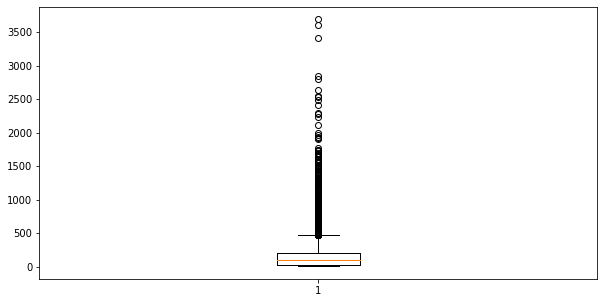

In [53]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize =(10, 5))

plt.boxplot(df_grouped['Quantity_Mod'])

# показываем график
plt.show()

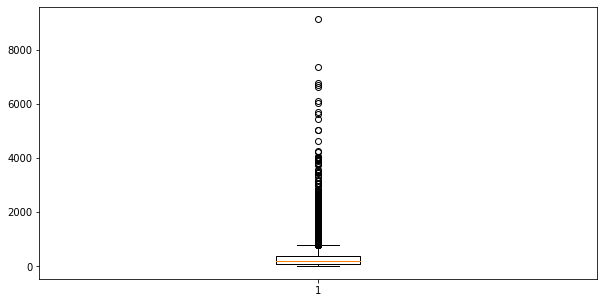

In [54]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize =(10, 5))

plt.boxplot(df_grouped['Sum'])

# показываем график
plt.show()

**b. Представитель какой страны**

In [55]:
df_country = df3[['Country', 'CustomerID']].drop_duplicates()
df_country

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
65,United Kingdom,15100.0
82,United Kingdom,15291.0
...,...,...
531741,United Kingdom,13436.0
532023,United Kingdom,15520.0
532823,United Kingdom,13298.0
533558,United Kingdom,14569.0


In [56]:
import statistics
mode_value = statistics.mode(df_country['Country'])
mode_value

'United Kingdom'

**c. 75% потребителей не больше какой суммы тратят?**

In [57]:
df_user = df3.groupby('CustomerID').agg({'Sum': 'sum'}).reset_index()
df_user

,CustomerID,Sum
0,12347.0,4060.40
1,12348.0,560.60
2,12349.0,1457.55
3,12350.0,334.40
4,12352.0,1786.07
...,...,...
4284,18280.0,180.60
4285,18281.0,80.82
4286,18282.0,179.50
4287,18283.0,2045.53


In [58]:
df_user['Sum'].quantile(0.75)

1502.7800000000002

**d. Средняя длина жизни потребителя**

In [59]:
df_user = df3.groupby('CustomerID').agg({'InvoiceDate': 'min'}).reset_index()
df_user = df_user.rename(columns={'InvoiceDate': 'min_date'})

df_user2 = df3.groupby('CustomerID').agg({'InvoiceDate': 'max'}).reset_index()
df_user2 = df_user2.rename(columns={'InvoiceDate': 'max_date'})

df_user = pd.merge(df_user, df_user2, on = 'CustomerID')
df_user['lifetime'] = (df_user['max_date']-df_user['min_date'])

In [60]:
df_user.describe()

,CustomerID,lifetime
count,4289.000000,4289
mean,15292.107251,132 days 18:51:36.120307762
std,1719.210673,132 days 17:01:24.702870334
min,12347.000000,0 days 00:00:00
25%,13811.000000,0 days 00:00:00
50%,15288.000000,95 days 00:10:00
75%,16769.000000,253 days 23:35:00
max,18287.000000,373 days 02:19:00


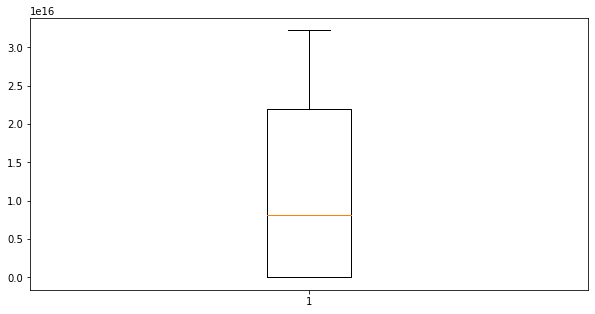

In [61]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize =(10, 5))

plt.boxplot(df_user['lifetime'])

# показываем график
plt.show()

e. Придумайте свою метрику - 90% потребителей не делают больше.. отказов/возвратов 

In [62]:
df3['Return'] = df3['InvoiceNo'].str.contains('C', na=False).astype(int)
df_returns = df3[df3['Return'] == 1]
df_returns = df_returns.groupby('CustomerID').InvoiceNo.nunique().reset_index()
df_returns

,CustomerID,InvoiceNo
0,12352.0,1
1,12359.0,2
2,12362.0,3
3,12375.0,1
4,12379.0,1
...,...,...
1523,18272.0,1
1524,18274.0,1
1525,18276.0,2
1526,18277.0,1


In [63]:
df_returns['InvoiceNo'].quantile(0.9)

4.0

**f. Сделайте любую содержательную визуализацию**

In [64]:
# создаем новый столбец 'weekday', который содержит день недели для каждого заказа
df3['weekday'] = df3['InvoiceDate'].dt.weekday

# подсчитываем количество заказов для каждого дня недели
orders_per_weekday = df3.groupby(['weekday']).InvoiceNo.nunique().sort_index()

In [65]:
orders_per_weekday.loc[5] = 0
orders_per_weekday = orders_per_weekday.sort_index()
orders_per_weekday

weekday
0    3309
1    3666
2    3894
3    4749
4    3165
5       0
6    2303
Name: InvoiceNo, dtype: int64

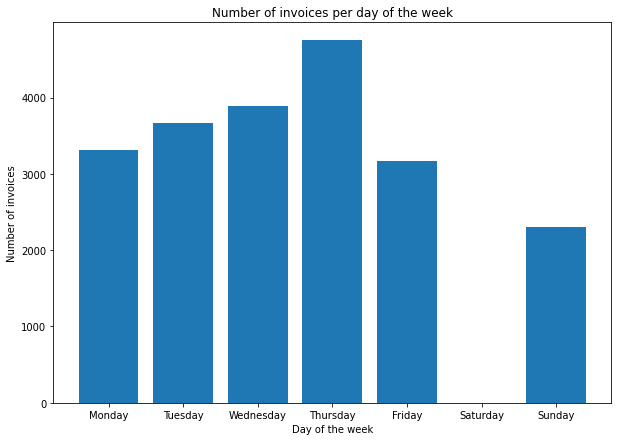

In [66]:
import datetime as dt
import matplotlib.pyplot as plt

# создаем график
plt.figure(figsize=(10, 7))
plt.bar(orders_per_weekday.index, orders_per_weekday.values, tick_label=['Monday', 'Tuesday', 
                                                                         'Wednesday', 'Thursday',
                                                                         'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of the week')
plt.ylabel('Number of invoices')
plt.title('Number of invoices per day of the week')
plt.show()